# Moving Fiscal Data from a sqlite db to a dask dataframe 

This post includes code from [Scalable-Data-Analysis-in-Python-with-Dask](https://github.com/PacktPublishing/-Scalable-Data-Analysis-in-Python-with-Dask/tree/master/Section%202) and [coiled-examples](https://github.com/coiled/coiled-examples).

In [3]:
import numpy as np
import dask.array as da
import pandas as pd
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

In [4]:
# engine = db.create_engine('sqlite:///fiscal_data.db')
# connection = engine.connect()
# metadata = db.MetaData()

In [5]:
# engine.execute("SELECT * FROM fiscal_data LIMIT 1").fetchall()

In [6]:
# sql = """
# SELECT year
# , region
# , province
# , gdp
# , fdi
# , it
# , specific
# FROM fiscal_data
# """

# cnxn = connection

In [7]:
# df = pd.read_sql(sql, cnxn)

In [8]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/Kearney_Data_Science/master/_notebooks/df_panel_fix.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

df = df[['year', 'province', 'gdp', 'fdi', 'it', 'specific']]
df

/tmp/ipykernel_191516/2939603070.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, error_bad_lines=False)


,year,province,gdp,fdi,it,specific
0,1996,Anhui,2093.30,50661,631930,147002.0
1,1997,Anhui,2347.32,43443,657860,151981.0
2,1998,Anhui,2542.96,27673,889463,174930.0
3,1999,Anhui,2712.34,26131,1227364,285324.0
4,2000,Anhui,2902.09,31847,1499110,195580.0
...,...,...,...,...,...,...
355,2003,Zhejiang,9705.02,498055,2261631,391292.0
356,2004,Zhejiang,11648.70,668128,3162299,656175.0
357,2005,Zhejiang,13417.68,772000,2370200,656175.0
358,2006,Zhejiang,15718.47,888935,2553268,1017303.0


In [9]:
df.columns

Index(['year', 'province', 'gdp', 'fdi', 'it', 'specific'], dtype='object')

<AxesSubplot:>

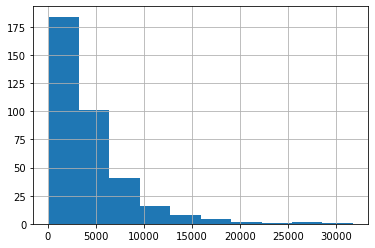

In [10]:
df.gdp.hist()

In [11]:
from dask.distributed import Client

client = Client(processes=False, threads_per_worker=2,
                n_workers=3, memory_limit='4GB')
client

/home/gao/anaconda3/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38997 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.0.198:38997/status,
Dashboard: http://192.168.0.198:38997/status,Workers: 3
Total threads: 6,Total memory: 11.18 GiB
Status: running,Using processes: False
Comm: inproc://192.168.0.198/191516/1,Workers: 3
Dashboard: http://192.168.0.198:38997/status,Total threads: 6
Started: Just now,Total memory: 11.18 GiB
Comm: inproc://192.168.0.198/191516/6,Total threads: 2
Dashboard: http://192.168.0.198:41221/status,Memory: 3.73 GiB
Nanny: None,


In [12]:
from dask import dataframe as dd 

In [13]:
ddf = dd.from_pandas(df, npartitions=5)

In [14]:
print(ddf)

Dask DataFrame Structure:
                year province      gdp    fdi     it specific
npartitions=5                                                
0              int64   object  float64  int64  int64  float64
72               ...      ...      ...    ...    ...      ...
...              ...      ...      ...    ...    ...      ...
288              ...      ...      ...    ...    ...      ...
359              ...      ...      ...    ...    ...      ...
Dask Name: from_pandas, 5 tasks


In [15]:
ddf.npartitions

5

In [16]:
ddf.npartitions

5

In [18]:
#len(ddf)

In [19]:
from dask.distributed import Client

client = Client(processes=False, threads_per_worker=2,
                n_workers=3, memory_limit='4GB')
client

/home/gao/anaconda3/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38143 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.0.198:38143/status,
Dashboard: http://192.168.0.198:38143/status,Workers: 3
Total threads: 6,Total memory: 11.18 GiB
Status: running,Using processes: False
Comm: inproc://192.168.0.198/191516/17,Workers: 3
Dashboard: http://192.168.0.198:38143/status,Total threads: 6
Started: Just now,Total memory: 11.18 GiB
Comm: inproc://192.168.0.198/191516/21,Total threads: 2
Dashboard: http://192.168.0.198:41593/status,Memory: 3.73 GiB
Nanny: None,


In [38]:
# ddf.describe().compute()

In [ ]:
ddf.columns

In [21]:
feat_list = ["year", "fdi"]
cat_feat_list = ["region", "province"]
target = ["gdp"]

In [22]:
ddf["year"] = ddf["year"].astype(float)
ddf["fdi"] = ddf["fdi"].astype(float)
#ddf["province"] = ddf["province"].astype(float)
#ddf["region"] = ddf["region"].astype(float)
ddf["gdp"] = ddf["gdp"].astype(float)
ddf["it"] = ddf["it"].astype(float)

In [23]:
type(target)

list

In [24]:
x=ddf[feat_list].persist()
y=ddf[target].persist()

In [25]:
x

,year,fdi
npartitions=5,,
0,float64,float64
72,...,...
...,...,...
288,...,...
359,...,...


In [26]:
y.compute()

,gdp
0,2093.30
1,2347.32
2,2542.96
3,2712.34
4,2902.09
...,...
355,9705.02
356,11648.70
357,13417.68
358,15718.47


In [27]:
print(x.shape,y.shape)

(Delayed('int-7697e36a-6f26-463f-b569-cd6cb3c56c0d'), 2) (Delayed('int-fa1a46f4-fb68-4b3e-8c40-9c4c7d4e01be'), 1)


In [39]:
# x.count().compute()

In [32]:
from dask_ml.xgboost import XGBRegressor

/home/gao/anaconda3/lib/python3.9/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(


In [33]:
XGBR = XGBRegressor()

In [41]:
%%time
# XGBR_model = XGBR.fit(x,y)

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 22.2 µs


In [43]:
# XGBR_model

In [44]:
client.close()